Создание модуля загрузки датасета. Визуализация данных различными методами. Создание метода для подсчета пропущенных значений и заполнения данными.

In [1]:
# main.py
import pandas as pd
import numpy as np
import kagglehub
import sys
sys.path.append('/content/sample_data')
import loader_dataset as loader
import mdl_analysis as analysis
import mdl_visualization as visual
import mdl_preprocessing as preproc
import csv

# Загрузка датасета с сайта https://www.kaggle.com/
file_path = "/content/sample_data/dataset_laptop.csv"
print(file_path)

dataset = loader.load_csv_file(file_path)

/content/sample_data/dataset_laptop.csv
Данные успешно загружены.


In [2]:
# Вывод статистической информации
analysis.statistic_data(dataset)

Первые 5 записей:
     Brand    Processor  RAM (GB)    Storage                 GPU  \
0   Apple  AMD Ryzen 3        64  512GB SSD     Nvidia GTX 1650   
1   Razer  AMD Ryzen 7         4    1TB SSD     Nvidia RTX 3080   
2    Asus     Intel i5        32    2TB SSD     Nvidia RTX 3060   
3  Lenovo     Intel i5         4  256GB SSD     Nvidia RTX 3080   
4   Razer     Intel i3         4  256GB SSD  AMD Radeon RX 6600   

   Screen Size (inch) Resolution  Battery Life (hours)  Weight (kg)  \
0                17.3  2560x1440                   8.9         1.42   
1                14.0   1366x768                   9.4         2.57   
2                13.3  3840x2160                   8.5         1.74   
3                13.3   1366x768                  10.5         3.10   
4                16.0  3840x2160                   5.7         3.38   

  Operating System  Price ($)  
0          FreeDOS    3997.07  
1            Linux    1355.78  
2          FreeDOS    2673.07  
3          Windows     

In [ ]:
# Пропущенных значений в датасете нет, не требуется заполнение данных

In [2]:
# Кодирование категориальных признаков
preproc.encoder_feature(dataset)

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($),Brand_int,Processor_int,Storage_int,GPU_int,Resolution_int,Operating System_int
0,Apple,AMD Ryzen 3,64,512GB SSD,Nvidia GTX 1650,17.3,2560x1440,8.9,1.42,FreeDOS,3997.07,1,0,4,3,2,0
1,Razer,AMD Ryzen 7,4,1TB SSD,Nvidia RTX 3080,14.0,1366x768,9.4,2.57,Linux,1355.78,8,2,1,6,0,1
2,Asus,Intel i5,32,2TB SSD,Nvidia RTX 3060,13.3,3840x2160,8.5,1.74,FreeDOS,2673.07,2,5,3,5,3,0
3,Lenovo,Intel i5,4,256GB SSD,Nvidia RTX 3080,13.3,1366x768,10.5,3.10,Windows,751.17,5,5,2,6,0,2
4,Razer,Intel i3,4,256GB SSD,AMD Radeon RX 6600,16.0,3840x2160,5.7,3.38,Linux,2059.83,8,4,2,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11763,Acer,Intel i3,4,2TB SSD,Nvidia RTX 2060,17.3,1366x768,11.5,1.58,macOS,704.82,0,4,3,4,0,3
11764,Asus,Intel i3,4,2TB SSD,AMD Radeon RX 6800,16.0,1366x768,9.5,2.14,Linux,775.59,2,4,3,1,0,1
11765,Razer,AMD Ryzen 9,4,2TB SSD,AMD Radeon RX 6600,15.6,2560x1440,8.2,2.05,Linux,2789.46,8,3,3,0,2,1
11766,Samsung,AMD Ryzen 7,16,512GB SSD,Integrated,13.3,1920x1080,7.5,1.48,macOS,1067.13,9,2,4,2,1,3


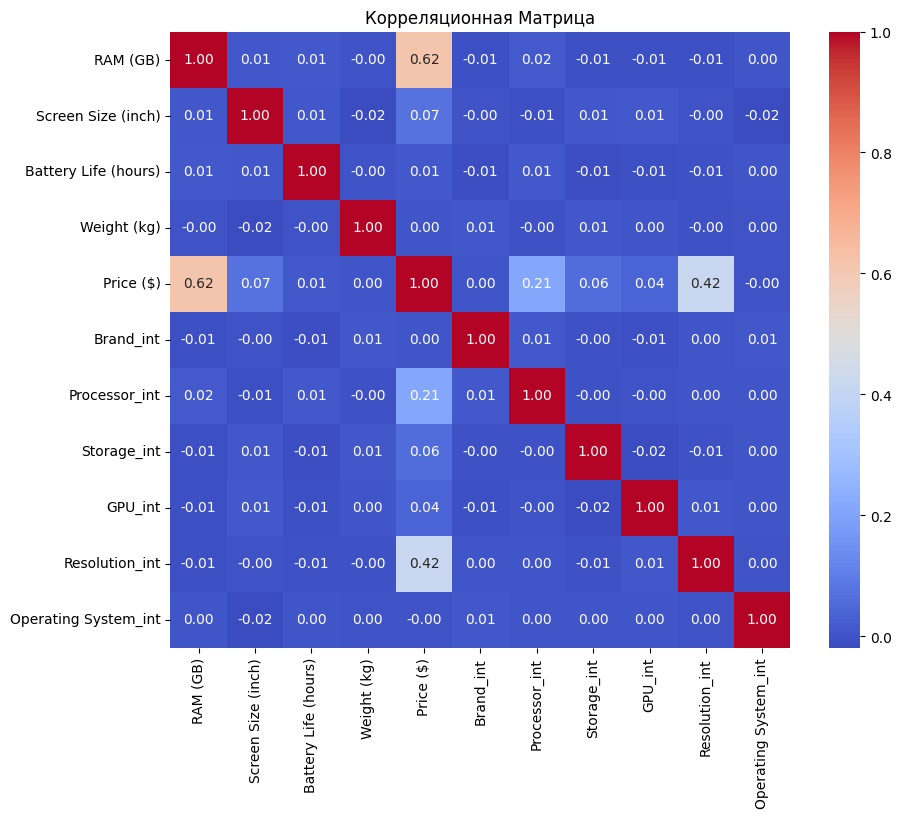

График сохранен: sample_data/outputs/correlation_matrix.png


In [5]:
# Матрица корреляций
dataset_corr = dataset.drop(['Brand', 'Processor', 'Storage', 'GPU', 'Resolution', 'Operating System'], axis=1)
analysis.corr_data(dataset_corr)

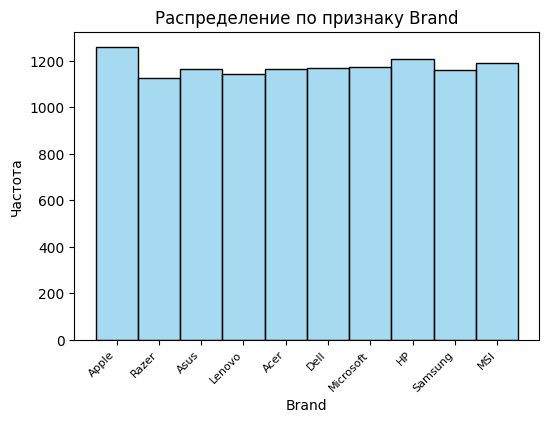

График сохранен: sample_data/outputs/distribution_Brand.png


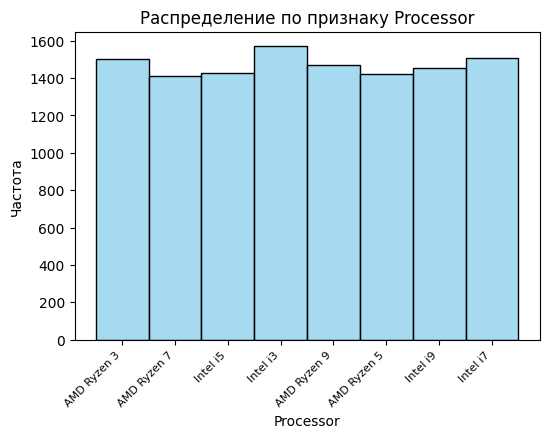

График сохранен: sample_data/outputs/distribution_Processor.png


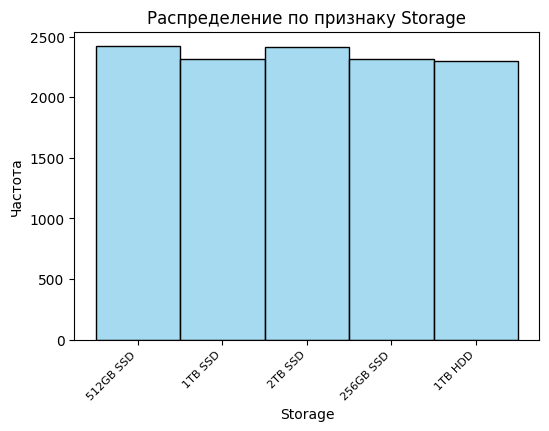

График сохранен: sample_data/outputs/distribution_Storage.png


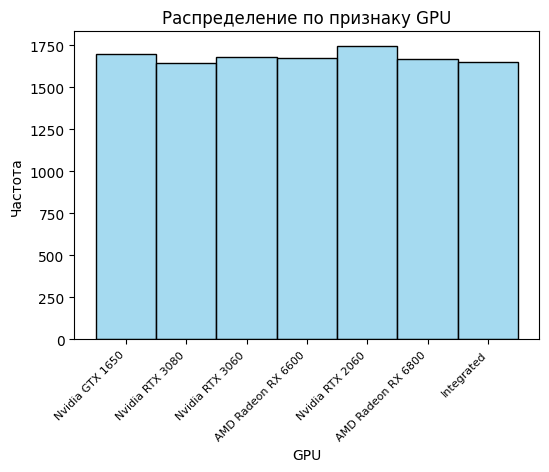

График сохранен: sample_data/outputs/distribution_GPU.png


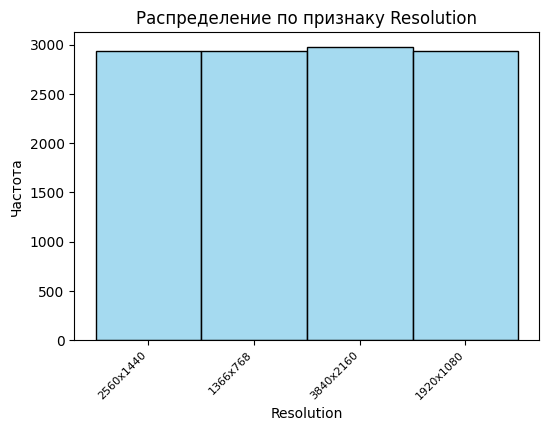

График сохранен: sample_data/outputs/distribution_Resolution.png


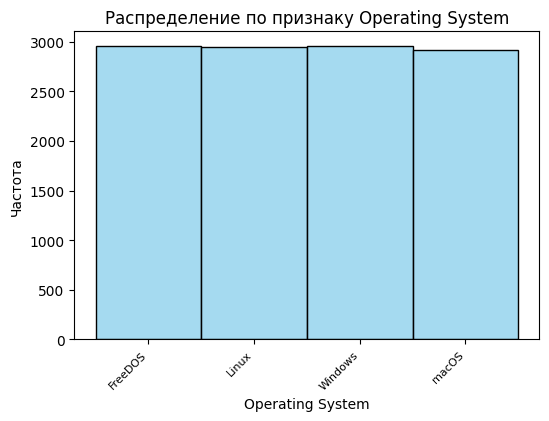

График сохранен: sample_data/outputs/distribution_Operating System.png


In [9]:
# Графики распределения по признакам
features = ['Brand', 'Processor','Storage','GPU','Resolution','Operating System']
for feature in features:
  visual.visual_distribution(dataset, feature)

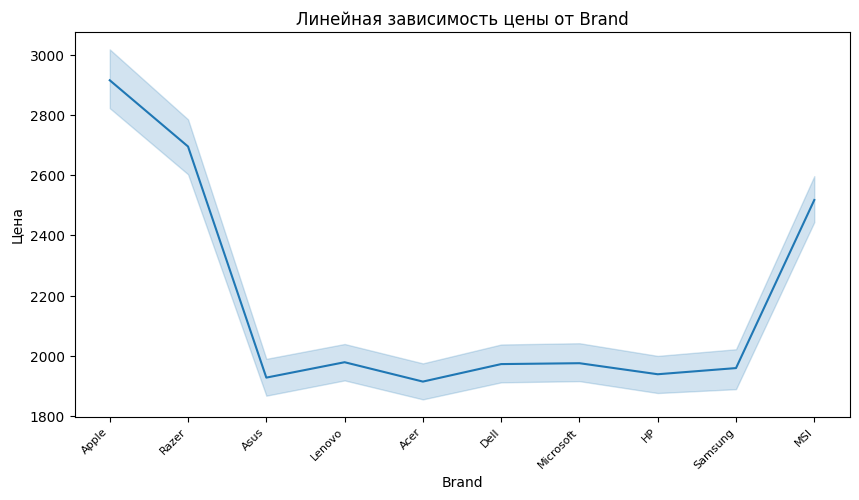

График сохранен: sample_data/outputs/lineplot_by_Brand.png


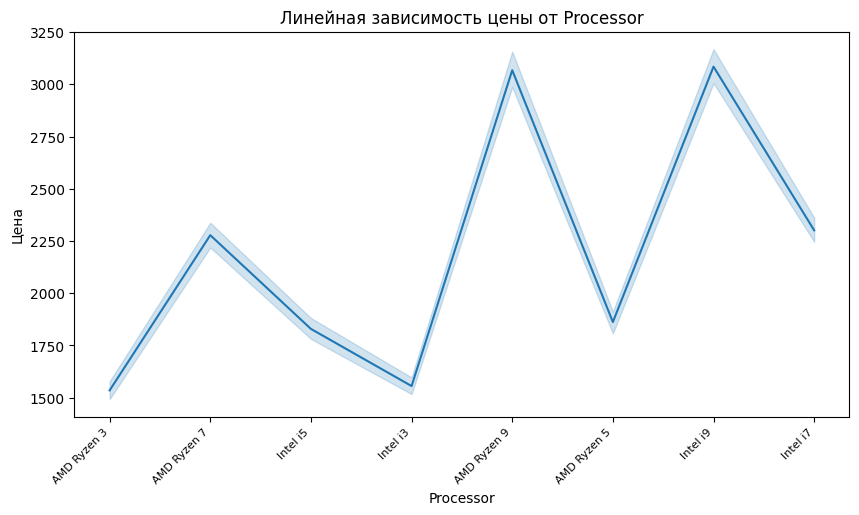

График сохранен: sample_data/outputs/lineplot_by_Processor.png


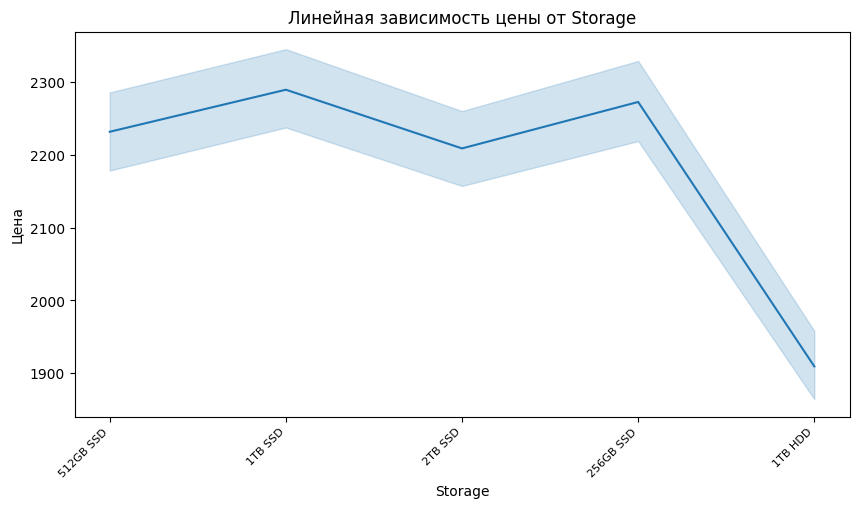

График сохранен: sample_data/outputs/lineplot_by_Storage.png


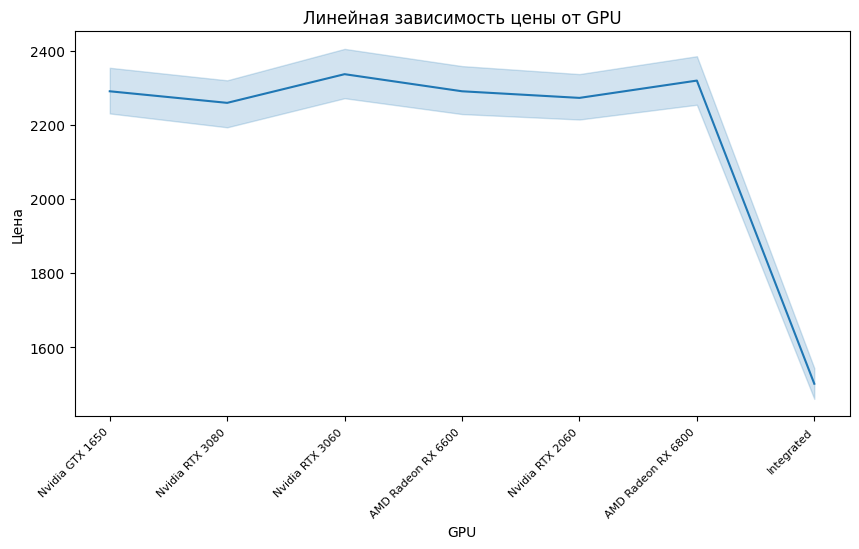

График сохранен: sample_data/outputs/lineplot_by_GPU.png


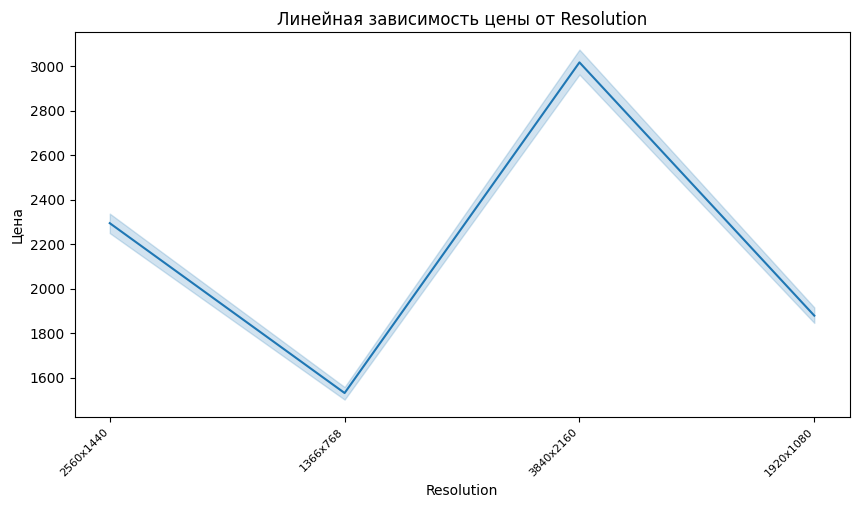

График сохранен: sample_data/outputs/lineplot_by_Resolution.png


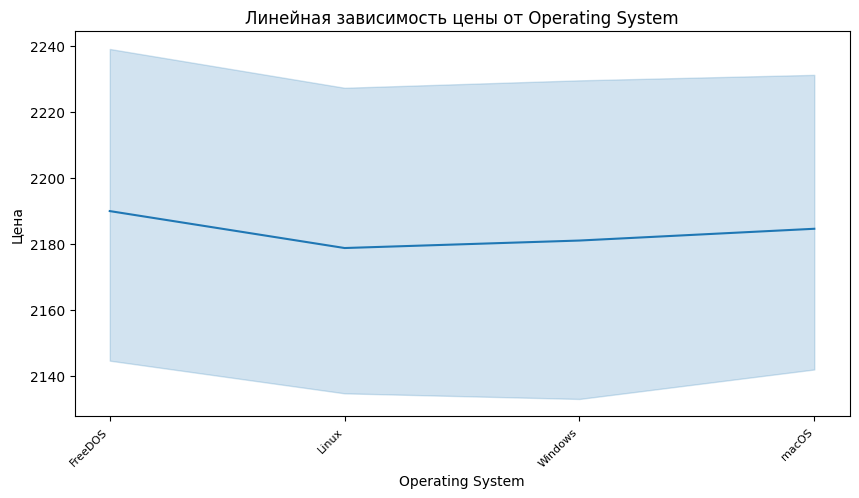

График сохранен: sample_data/outputs/lineplot_by_Operating System.png


In [10]:
# Графики линейной зависимости признаков от цены
features = ['Brand', 'Processor','Storage','GPU','Resolution','Operating System']
for feature in features:
  visual.visual_lineplot_by_feature(dataset, feature)

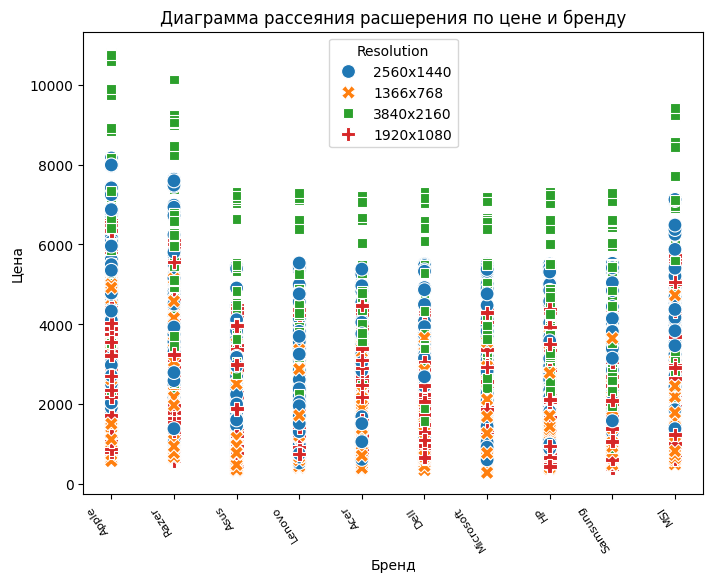

График сохранен: sample_data/outputs/scatterplot.png


In [8]:
# Диаграмма рассеяния (цена, бренд, расшерение)
visual.visual_scatterplot(dataset)

In [ ]:
# В целях повышения практики создадим модель предсказания операционной системы
# (хотя признаков в данном датасете недостаточно для этой цели) и стоимости ноутбуков

Accuracy: 0.23491928632115547
Recall: 0.23491928632115547
Precision: 0.2326741757574257
Matrix: [[ 86 421  42  31]
 [118 399  42  30]
 [100 419  44  32]
 [104 430  32  24]]
График сохранен: sample_data/outputs/conf_matrix.png


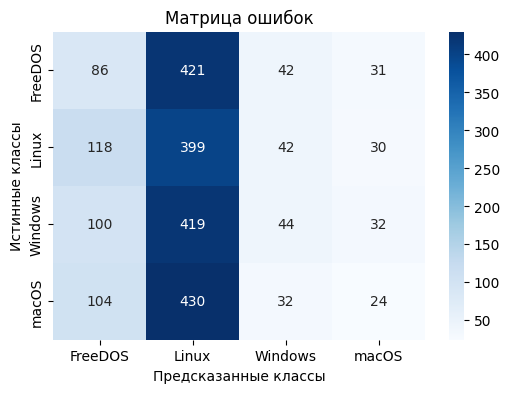

In [29]:
# Модель для предсказания класса (Operating System)
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt

dataset_classifier = dataset.drop(['Price ($)', 'Brand', 'Processor', 'Storage', 'GPU', 'Resolution', 'Operating System'], axis=1)

X = dataset_classifier.drop('Operating System_int', axis=1)  # Все столбцы, кроме target
y = dataset_classifier['Operating System_int']  # Только столбец target

# Разделим данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Создание и обучение классификатора
clf = SVC(kernel='poly', random_state=42)
clf.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = clf.predict(X_test)

# Вычисление метрик
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted', zero_division=np.nan)

# Метрики и матрица предсказаний
print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'Matrix: {conf_matrix}')

conf_matrix = confusion_matrix(y_test, y_pred)
target_names = dataset['Operating System'].unique()
# Визуализация матрицы ошибок
fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)
plt.xlabel('Предсказанные классы')
plt.ylabel('Истинные классы')
plt.title('Матрица ошибок')
name_file = f'conf_matrix.png'
visual.save_plot(fig, name_file)
plt.show()

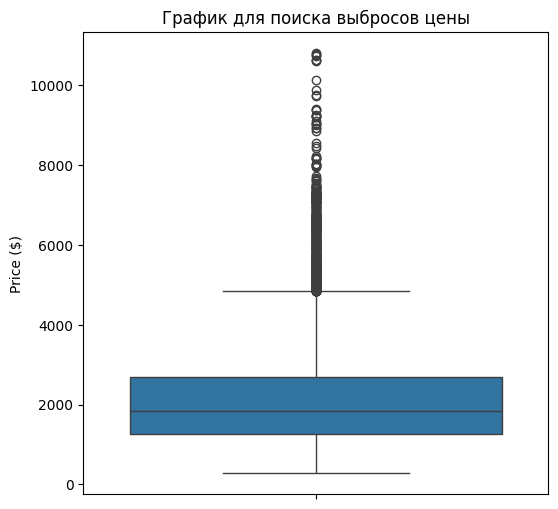

График сохранен: sample_data/outputs/outliers.png


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
# Ящик с усами
fig, ax = plt.subplots(figsize=(6, 6))
sns.boxplot(data=dataset['Price ($)'])
plt.xticks(rotation=90)
plt.title(f'График для поиска выбросов цены')
plt.show()
name_file = f'outliers.png'
visual.save_plot(fig, name_file)

In [4]:
from scipy.stats import zscore
# Поиск и удаление выбросов
# Z-оценка
# Вычисление Z-оценка
dataset['z_score'] = zscore(dataset['Price ($)'])

# Определение выбросов
threshold = 3
outliers = dataset[(dataset['z_score'] > threshold) | (dataset['z_score'] < -threshold)]

# Подсчет количества выбросов
num_outliers = outliers.shape[0]
print(f'Всего выбросов: {num_outliers} ')

# Удаление выбросов
dataset_regressor = dataset[(dataset['z_score'] <= threshold) & (dataset['z_score'] >= -threshold)]

# Удаление временный столбец z_score
dataset_regressor = dataset_regressor.drop(columns=['z_score'])

Всего выбросов: 229 


In [5]:
dataset_regressor = dataset_regressor.drop(['Brand', 'Processor', 'Storage', 'GPU', 'Resolution', 'Operating System'], axis=1)

*****************
Метрики качества:
*****************
MAE: 179.9375
MSE: 67775.3668
RMSE: 260.3370
R²: 0.9450


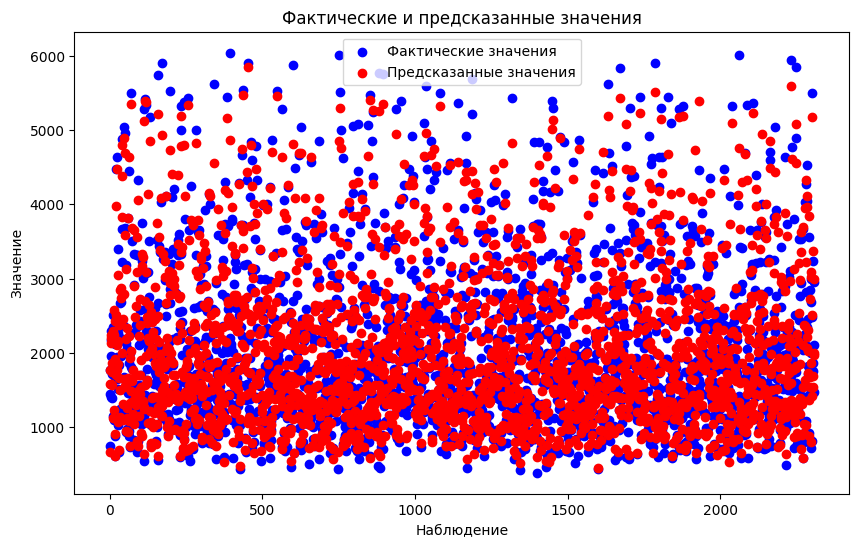

График сохранен: sample_data/outputs/predictions.png


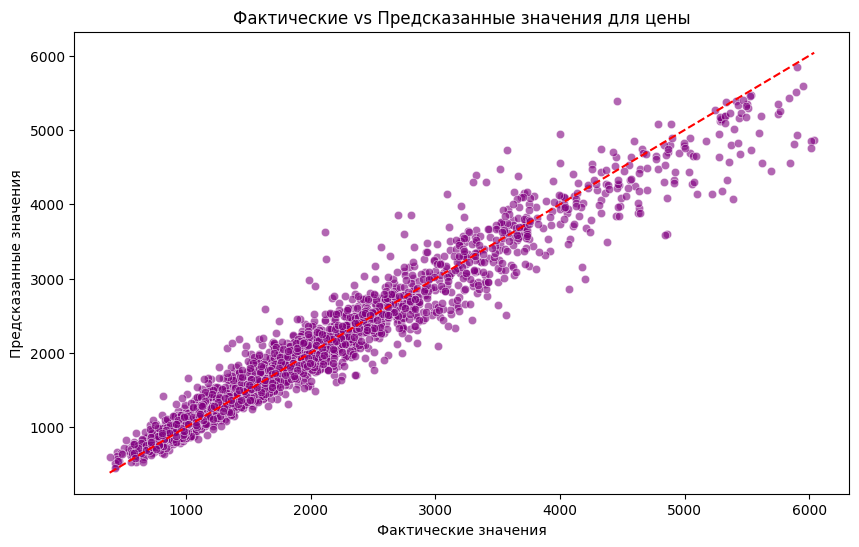

График сохранен: sample_data/outputs/predictions_scatterplot.png


In [6]:
# Модель для предсказания стоимости
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

X = dataset_regressor.drop('Price ($)', axis=1)  # Все столбцы, кроме target
y = dataset_regressor['Price ($)']  # Только столбец target

# Разделим данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Создание и обучение классификатора
model_XGBRegressor = XGBRegressor(random_state=42,
                     n_estimators=300,
                     learning_rate=0.1,
                     max_depth=20,
                     min_child_weight=5,
                     objective='reg:squarederror') # параметры
model_XGBRegressor.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model_XGBRegressor.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'*****************')
print(f'Метрики качества:')
print(f'*****************')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

start_index = 5000
end_index = 5500

# Визуализация предсказанных и фактических значений
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Фактические значения')
plt.scatter(range(len(y_test)), y_pred, color='red', label='Предсказанные значения')
plt.xlabel('Наблюдение')
plt.ylabel('Значение')
plt.title(f'Фактические и предсказанные значения')
plt.legend()
plt.show()
name_file = f'predictions.png'
visual.save_plot(fig, name_file)

# Диаграмма предсказанных vs фактических значений для целевой переменной
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='purple', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title(f'Фактические vs Предсказанные значения для цены')
plt.show()
name_file = f'predictions_scatterplot.png'
visual.save_plot(fig, name_file)